In [1]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached pydantic-2.8.2-py3-none-any.whl.metadata (125 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.10.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached antlr4-python3-runtime-4.9.3.tar.gz (117 kB)
  Preparing metadata (setup.py) ... done
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached protobuf-5.28.0-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata 

In [6]:
import os
import warnings

import numpy as np

warnings.filterwarnings('ignore')
np.random.seed(123)

In [7]:
from autogluon.core.utils.loaders import load_zip

download_dir = './ag_multimodal_tutorial'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/petfinder_for_tutorial.zip'

load_zip.unzip(zip_file, unzip_dir=download_dir)

In [8]:
import pandas as pd

dataset_path = f'{download_dir}/petfinder_for_tutorial'

train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)

label_col = 'AdoptionSpeed'

In [9]:
image_col = 'Images'

train_data[image_col] = train_data[image_col].apply(lambda ele: ele.split(';')[0])
test_data[image_col] = test_data[image_col].apply(lambda ele: ele.split(';')[0])

def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))

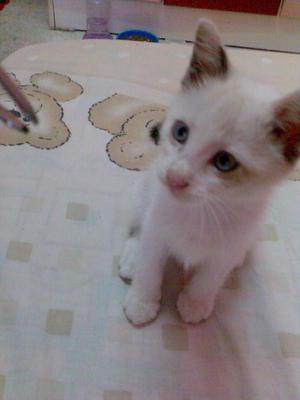

"I rescued Yumi Hamasaki at a food stall far away in Kelantan. At that time i was on my way back to KL, she was suffer from stomach problem and looking very2 sick.. I send her to vet & get the treatment + vaccinated and right now she's very2 healthy.. About yumi : - love to sleep with ppl - she will keep on meowing if she's hugry - very2 active, always seeking for people to accompany her playing - well trained (poo+pee in her own potty) - easy to bathing - I only feed her with these brands : IAMS, Kittenbites, Pro-formance Reason why i need someone to adopt Yumi: I just married and need to move to a new house where no pets are allowed :( As Yumi is very2 special to me, i will only give her to ppl that i think could take care of her just like i did (especially on her foods things).."

In [10]:
example_row = train_data.iloc[0]
example_image = example_row[image_col]

from IPython.display import Image, display
pil_img = Image(filename=example_image)
display(pil_img)

example_row['Description']

In [11]:
from autogluon.multimodal import MultiModalPredictor

predictor = MultiModalPredictor(label=label_col).fit(
    train_data=train_data,
    time_limit=120
)

No path specified. Models will be saved in: "AutogluonModels\ag-20240826_103552"
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Pytorch Version:    2.3.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.85 GB / 15.62 GB (11.8%)
Disk Space Avail:   158.15 GB / 445.56 GB (35.5%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorb

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 0
GPU Count to be Used: 0

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name              | Type                | Params | Mode 
------------------------------------------------------------------
0 | model             | MultimodalFusionMLP | 207 M  | train
1 | validation_metric | BinaryAUROC         | 0      | train
2 | loss_func         | CrossEntropyLoss    | 0      | train
------------------------------------------------------------------
207 M     Trainable params
0         Non-trainable params
207 M     Total params
828.307   Total estimated model params size (MB)


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Time limit reached. Elapsed time is 0:02:12. Signaling Trainer to stop.


Validation: |                                                                                    | 0/? [00:00<…

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("C:\Users\milin\Downloads\AutoGluon\AutogluonModels\ag-20240826_103552")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [12]:
predictions = predictor.predict(test_data.drop(columns=label_col))
predictions[:5]

Predicting: |                                                                                    | 0/? [00:00<…

8     0
70    0
82    1
28    1
63    1
Name: AdoptionSpeed, dtype: int64

In [13]:
probs = predictor.predict_proba(test_data.drop(columns=label_col))
probs[:5]

Predicting: |                                                                                    | 0/? [00:00<…

,0,1
8,0.530209,0.469791
70,0.713738,0.286262
82,0.096845,0.903155
28,0.449914,0.550086
63,0.102060,0.897940


In [14]:
scores = predictor.evaluate(test_data, metrics=["roc_auc"])
scores

Predicting: |                                                                                    | 0/? [00:00<…

{'roc_auc': 0.6447999999999999}

In [ ]:
{'roc_auc': 0.8988}

In [15]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from autogluon.multimodal.utils.misc import shopee_dataset
download_dir = './ag_automm_tutorial_imgcls'
train_data_path, test_data_path = shopee_dataset(download_dir)
print(train_data_path)

100%|████████████████████████████████████████████████████████████████████████████| 84.0M/84.0M [00:08<00:00, 9.99MiB/s]
Unzipping ./ag_automm_tutorial_imgcls\file.zip to ./ag_automm_tutorial_imgcls


                                                 image  label
0    C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      0
1    C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      0
2    C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      0
3    C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      0
4    C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      0
..                                                 ...    ...
795  C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      3
796  C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      3
797  C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      3
798  C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      3
799  C:\Users\milin\Downloads\AutoGluon\ag_automm_t...      3

[800 rows x 2 columns]


In [16]:
import warnings
warnings.filterwarnings('ignore')

download_dir = './ag_automm_tutorial_imgcls'
train_data_byte, test_data_byte = shopee_dataset(download_dir, is_bytearray=True)

Unzipping ./ag_automm_tutorial_imgcls\file.zip to ./ag_automm_tutorial_imgcls


In [23]:
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_shopee"
predictor = MultiModalPredictor(label="label", path=model_path)
predictor.fit(
    train_data=train_data_path,
    time_limit=300, # seconds
)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Pytorch Version:    2.3.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       2.96 GB / 15.62 GB (18.9%)
Disk Space Avail:   145.17 GB / 445.56 GB (32.6%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	4 unique label values:  [0, 1, 2, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir C:\Users\milin\Downloads

Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Time limit reached. Elapsed time is 0:00:35. Signaling Trainer to stop.


Validation: |                                                                                    | 0/? [00:00<…

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("C:\Users\milin\Downloads\AutoGluon\tmp\7f919a88f42a4746832719e137b209cd-automm_shopee")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [24]:
scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |                                                                                    | 0/? [00:00<…

Top-1 test acc: 0.100


In [19]:
scores = predictor.evaluate(test_data_byte, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |                                                                                    | 0/? [00:00<…

Top-1 test acc: 0.100


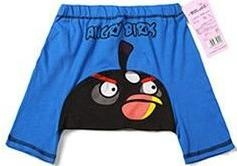

In [25]:
image_path = test_data_path.iloc[0]['image']
from IPython.display import Image, display
pil_img = Image(filename=image_path)
display(pil_img)

In [26]:
predictions = predictor.predict({'image': [image_path]})
print(predictions)

Predicting: |                                                                                    | 0/? [00:00<…

[1]


In [6]:
import os
import pandas as pd
from autogluon.multimodal import MultiModalPredictor
import uuid

# File paths for the Fake and Real image directories
fake_dir = '/home/michael/Documenti/Milinda_Githubproject/Forge_Image_Orginal/Fake/'
real_dir = '/home/michael/Documenti/Milinda_Githubproject/Forge_Image_Orginal/Real/'

# Prepare the data
def prepare_data(fake_dir, real_dir):
    data = []
    for img_name in os.listdir(fake_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            img_path = os.path.join(fake_dir, img_name)
            data.append({'image': img_path, 'label': 0})  # Fake = 0
    
    for img_name in os.listdir(real_dir):
        if img_name.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            img_path = os.path.join(real_dir, img_name)
            data.append({'image': img_path, 'label': 1})  # Real = 1
    
    df = pd.DataFrame(data)
    return df

# Create the dataframe
data_df = prepare_data(fake_dir, real_dir)

# Split the data into training and testing sets (80/20 split)
train_df = data_df.sample(frac=0.8, random_state=42)
test_df = data_df.drop(train_df.index)

# Save the splits to CSV files
train_data_path = './train_data.csv'
test_data_path = './test_data.csv'

train_df.to_csv(train_data_path, index=False)
test_df.to_csv(test_data_path, index=False)

# Define the model path
model_path = f"./tmp/{uuid.uuid4().hex}-automm_shopee"

# Initialize the predictor
predictor = MultiModalPredictor(label="label", path=model_path)

# Train the model
predictor.fit(
    train_data=train_data_path,
    time_limit=400,  # seconds
)

# Evaluate the model using the CSV file path
#scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
#print('Top-1 test acc: %.3f' % scores["accuracy"])
# Print the results
# Evaluate the model using the CSV file path
metrics = ["accuracy", "precision", "recall", "f1"]
# If you want to use the DataFrame directly, you can do so like this:
scores = predictor.evaluate(test_df, metrics=metrics)
# Print the results
print('Evaluation metrics:')
print(f"Accuracy: {scores['accuracy']:.3f}")
print(f"Precision: {scores['precision']:.3f}")
print(f"Recall: {scores['recall']:.3f}")
print(f"F1 Score: {scores['f1']:.3f}")


=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.19
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #40~22.04.3-Ubuntu SMP PREEMPT_DYNAMIC Tue Jul 30 17:30:19 UTC 2
CPU Count:          32
Pytorch Version:    2.3.1+cu121
CUDA Version:       12.1
Memory Avail:       48.09 GB / 62.51 GB (76.9%)
Disk Space Avail:   684.19 GB / 843.94 GB (81.1%)
Loaded data from: ./train_data.csv | Columns = 2 / 2 | Rows = 128 -> 128
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])
Loaded data from: ./train_data.csv | Columns = 2 / 2 | Rows = 128 -> 128

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open

Sanity Checking: |                                                     | 0/? [00:00<?, ?it/s]

Training: |                                                            | 0/? [00:00<?, ?it/s]

Validation: |                                                          | 0/? [00:00<?, ?it/s]

Validation: |                                                          | 0/? [00:00<?, ?it/s]

Validation: |                                                          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 1: 'val_roc_auc' reached 0.42012 (best 0.42012), saving model to '/home/michael/Documenti/Milinda_Githubproject/AutoGluon/tmp/2216f53df16b43229e026d9b541964e9-automm_shopee/epoch=1-step=1.ckpt' as top 3


Validation: |                                                          | 0/? [00:00<?, ?it/s]

Validation: |                                                          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 2: 'val_roc_auc' reached 0.14201 (best 0.42012), saving model to '/home/michael/Documenti/Milinda_Githubproject/AutoGluon/tmp/2216f53df16b43229e026d9b541964e9-automm_shopee/epoch=2-step=2.ckpt' as top 3


Validation: |                                                          | 0/? [00:00<?, ?it/s]

Validation: |                                                          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 3: 'val_roc_auc' reached 0.09467 (best 0.42012), saving model to '/home/michael/Documenti/Milinda_Githubproject/AutoGluon/tmp/2216f53df16b43229e026d9b541964e9-automm_shopee/epoch=3-step=3.ckpt' as top 3


Validation: |                                                          | 0/? [00:00<?, ?it/s]

Validation: |                                                          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 4: 'val_roc_auc' was not in top 3


Validation: |                                                          | 0/? [00:00<?, ?it/s]

Validation: |                                                          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 5: 'val_roc_auc' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: |                                                          | 0/? [00:00<?, ?it/s]

Predicting: |                                                          | 0/? [00:00<?, ?it/s]

Predicting: |                                                          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/home/michael/Documenti/Milinda_Githubproject/AutoGluon/tmp/2216f53df16b43229e026d9b541964e9-automm_shopee")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




Predicting: |                                                          | 0/? [00:00<?, ?it/s]

Evaluation metrics:
Accuracy: 0.625
Precision: 0.688
Recall: 0.611
F1 Score: 0.647


Predicting: |                                                          | 0/? [00:00<?, ?it/s]

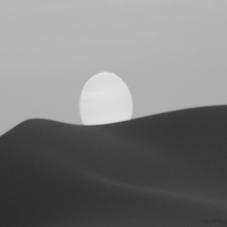

True Label: Fake
Predicted Label: Fake


In [7]:
# Take one image from the test data, show it, and display the label and prediction
# Let's take the first image in the test dataset
from IPython.display import Image, display

sample_image_path = test_df.iloc[1]['image']
true_label = test_df.iloc[1]['label']
predicted_label = predictor.predict({'image': [sample_image_path]})[0]

# Convert label numbers to human-readable labels
label_map = {0: 'Fake', 1: 'Real'}
true_label_text = label_map[true_label]
predicted_label_text = label_map[predicted_label]

# Display the image
display(Image(filename=sample_image_path))

# Print the true label and predicted label
print(f"True Label: {true_label_text}")
print(f"Predicted Label: {predicted_label_text}")

Predicting: |                                                          | 0/? [00:00<?, ?it/s]

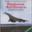

Predicted Label: Real


In [24]:
import os
from IPython.display import Image, display

# Specify the path to the image you want to predict
sample_image_path = '/home/michael/Documenti/Milinda_Githubproject/CIFAKE/test/REAL/0000.jpg'

# Predict the label using the model
predicted_label = predictor.predict({'image': [sample_image_path]})[0]

# Convert label numbers to human-readable labels
label_map = {0: 'Fake', 1: 'Real'}
predicted_label_text = label_map[predicted_label]

# Display the image
display(Image(filename=sample_image_path))

# Print the predicted label
print(f"Predicted Label: {predicted_label_text}")
